<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [6]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.247876,87.762177,93.993608,-0.002654,271.001007,271.005005,-0.003997
1,0.0,1.0,33.164999,32.613687,89.587977,0.004764,165.371428,165.369708,0.001720
2,0.0,2.0,21.078479,99.874826,46.956037,0.002527,177.911870,177.909304,0.002567
3,0.0,3.0,84.695389,56.112975,82.590022,0.011247,233.409633,233.399630,0.010003
4,0.0,4.0,63.718763,45.768520,55.511855,0.000788,174.999926,174.999650,0.000276
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.872980,71.150568,62.082608,-0.001567,224.104589,224.107580,-0.002991
19996,999.0,16.0,37.308018,58.014939,30.690733,0.005879,136.019569,136.016204,0.003365
19997,999.0,17.0,80.308774,31.170542,72.219676,-0.006187,193.692806,193.701687,-0.008881
19998,999.0,18.0,40.752634,58.346657,35.859414,0.003430,144.962135,144.961111,0.001024


In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.247876,87.762177,93.993608,-0.002654,271.001007,271.005005,-0.003997
1,0.0,1.0,33.164999,32.613687,89.587977,0.004764,165.371428,165.369708,0.001720
2,0.0,2.0,21.078479,99.874826,46.956037,0.002527,177.911870,177.909304,0.002567
3,0.0,3.0,84.695389,56.112975,82.590022,0.011247,233.409633,233.399630,0.010003
4,0.0,4.0,63.718763,45.768520,55.511855,0.000788,174.999926,174.999650,0.000276
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.872980,71.150568,62.082608,-0.001567,224.104589,224.107580,-0.002991
19996,999.0,16.0,37.308018,58.014939,30.690733,0.005879,136.019569,136.016204,0.003365
19997,999.0,17.0,80.308774,31.170542,72.219676,-0.006187,193.692806,193.701687,-0.008881
19998,999.0,18.0,40.752634,58.346657,35.859414,0.003430,144.962135,144.961111,0.001024


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.247876  87.762177  93.993608  ...  271.001007  271.005005 -0.003997
      1.0    33.164999  32.613687  89.587977  ...  165.371428  165.369708  0.001720
      2.0    21.078479  99.874826  46.956037  ...  177.911870  177.909304  0.002567
      3.0    84.695389  56.112975  82.590022  ...  233.409633  233.399630  0.010003
      4.0    63.718763  45.768520  55.511855  ...  174.999926  174.999650  0.000276
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   80.872980  71.150568  62.082608  ...  224.104589  224.107580 -0.002991
      16.0   37.308018  58.014939  30.690733  ...  136.019569  136.016204  0.003365
      17.0   80.308774  31.170542  72.219676  ...  193.692806  193.701687 -0.008881
      18.0   40.752634  58.346657  35.859414  ...  144.962135  144.961111  0.001024
      19.0   89.351764  73.910191  61.310967  ...  234.572666  234.574246 -0.001580

[20000 rows x 7 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.247876  87.762177  93.993608  ...  271.001007  271.005005 -0.003997
      1.0    33.164999  32.613687  89.587977  ...  165.371428  165.369708  0.001720
      2.0    21.078479  99.874826  46.956037  ...  177.911870  177.909304  0.002567
      3.0    84.695389  56.112975  82.590022  ...  233.409633  233.399630  0.010003
      4.0    63.718763  45.768520  55.511855  ...  174.999926  174.999650  0.000276
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   80.872980  71.150568  62.082608  ...  224.104589  224.107580 -0.002991
      16.0   37.308018  58.014939  30.690733  ...  136.019569  136.016204  0.003365
      17.0   80.308774  31.170542  72.219676  ...  193.692806  193.701687 -0.008881
      18.0   40.752634  58.346657  35.859414  ...  144.962135  144.961111  0.001024
      19.0   89.351764  73.910191  61.310967  ...  234.572666  234.574246 -0.001580

[20000 rows x 7 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.247876,87.762177,93.993608,-0.002654,271.001007,271.005005,-0.003997
1,0.0,1.0,33.164999,32.613687,89.587977,0.004764,165.371428,165.369708,0.001720
2,0.0,2.0,21.078479,99.874826,46.956037,0.002527,177.911870,177.909304,0.002567
3,0.0,3.0,84.695389,56.112975,82.590022,0.011247,233.409633,233.399630,0.010003
4,0.0,4.0,63.718763,45.768520,55.511855,0.000788,174.999926,174.999650,0.000276
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.872980,71.150568,62.082608,-0.001567,224.104589,224.107580,-0.002991
19996,999.0,16.0,37.308018,58.014939,30.690733,0.005879,136.019569,136.016204,0.003365
19997,999.0,17.0,80.308774,31.170542,72.219676,-0.006187,193.692806,193.701687,-0.008881
19998,999.0,18.0,40.752634,58.346657,35.859414,0.003430,144.962135,144.961111,0.001024


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.247876  87.762177  93.993608  ...  271.001007  271.005005 -0.003997
      1.0    33.164999  32.613687  89.587977  ...  165.371428  165.369708  0.001720
      2.0    21.078479  99.874826  46.956037  ...  177.911870  177.909304  0.002567
      3.0    84.695389  56.112975  82.590022  ...  233.409633  233.399630  0.010003
      4.0    63.718763  45.768520  55.511855  ...  174.999926  174.999650  0.000276
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   80.872980  71.150568  62.082608  ...  224.104589  224.107580 -0.002991
      16.0   37.308018  58.014939  30.690733  ...  136.019569  136.016204  0.003365
      17.0   80.308774  31.170542  72.219676  ...  193.692806  193.701687 -0.008881
      18.0   40.752634  58.346657  35.859414  ...  144.962135  144.961111  0.001024
      19.0   89.351764  73.910191  61.310967  ...  234.572666  234.574246 -0.001580

[20000 rows x 7 columns]

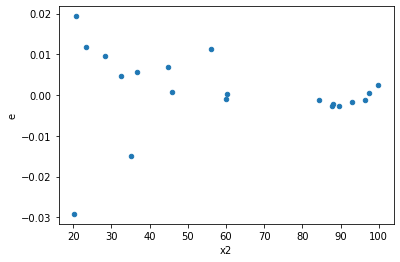

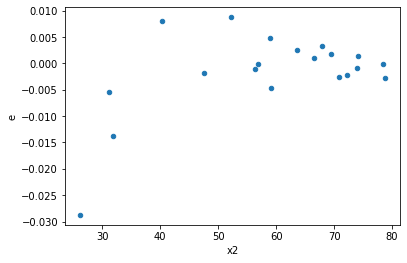

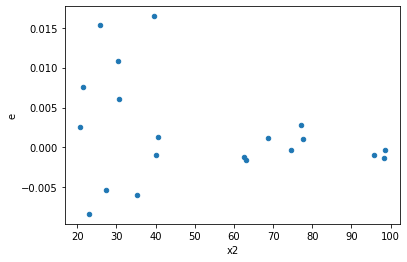

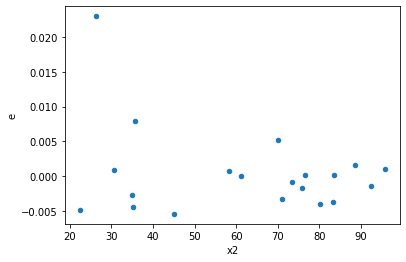

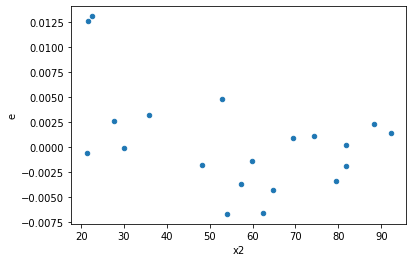

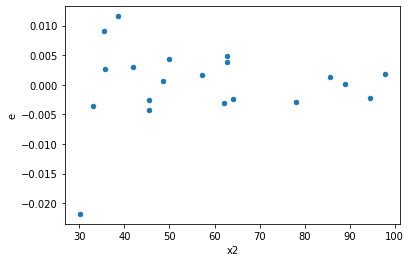

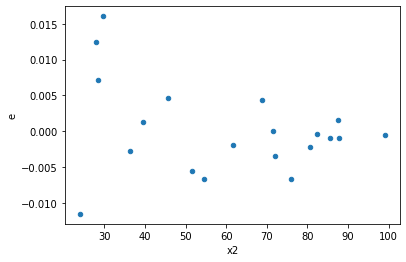

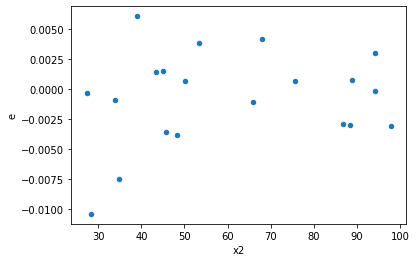

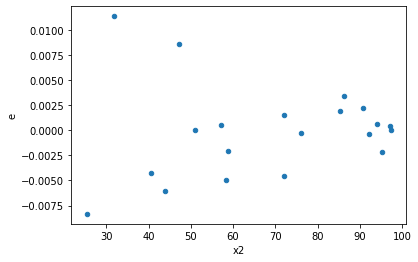

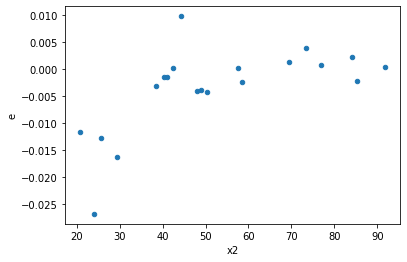

In [14]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
63.0,5.0,5.0,2.2281451786210865e-05,2.8859398829759284e-05,4.456290357242173e-06,5.771879765951857e-06,1.2952207561097637,0.7834427004933966,0.6082786497533017,0.3917213502466983,Reject001=1 : Homoscedasticity
67.0,5.0,5.0,6.097056160258909e-06,4.6890766963097564e-05,1.2194112320517819e-06,9.378153392619513e-06,7.6907224946910056,0.04291749833392666,0.9785412508330367,0.02145874916696333,Reject001=1 : Homoscedasticity
117.0,5.0,5.0,7.73671224717087e-06,1.627548546317428e-05,1.547342449434174e-06,3.2550970926348563e-06,2.1036694842988166,0.4337457536958793,0.7831271231520603,0.21687287684793966,Reject001=1 : Homoscedasticity
121.0,5.0,5.0,3.9503432960892125e-06,2.5024824564033836e-05,7.900686592178425e-07,5.004964912806767e-06,6.33484805961246,0.06396972790339195,0.968015136048304,0.031984863951695974,Reject001=1 : Homoscedasticity
231.0,5.0,5.0,3.936105048907298e-05,4.7603522893517424e-05,7.872210097814597e-06,9.520704578703485e-06,1.2094068197375127,0.8398187929515524,0.5800906035242238,0.4199093964757762,Reject001=1 : Homoscedasticity
255.0,5.0,5.0,1.0521575227439421e-05,3.301415386210569e-05,2.1043150454878844e-06,6.602830772421139e-06,3.1377577167349844,0.23512246796664593,0.882438766016677,0.11756123398332297,Reject001=1 : Homoscedasticity
268.0,5.0,5.0,6.940383342805312e-05,7.804729513506392e-05,1.3880766685610624e-05,1.5609459027012783e-05,1.1245386786303522,0.9006559073335842,0.5496720463332079,0.4503279536667921,Reject001=1 : Homoscedasticity
380.0,5.0,5.0,2.442215961693575e-05,2.7634587584849673e-05,4.88443192338715e-06,5.526917516969935e-06,1.1315374241386187,0.8954370121645145,0.5522814939177427,0.4477185060822573,Reject001=1 : Homoscedasticity
390.0,5.0,5.0,3.252025899397523e-05,3.869071984291172e-05,6.504051798795046e-06,7.738143968582345e-06,1.1897420574073425,0.8534493084270625,0.5732753457864688,0.42672465421353123,Reject001=1 : Homoscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.0016738684027280115,9.024390481572988e-06,0.0003347736805456023,1.8048780963145976e-06,0.005391338092567704,2.2747443865685646e-05,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,0.0005120313093290022,1.892793334385424e-05,0.00010240626186580044,3.785586668770848e-06,0.03696635928115135,0.0025080781273377,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,0.00023792798798602557,5.64407906244805e-06,4.758559759720511e-05,1.12881581248961e-06,0.02372179544837554,0.0008661126320248663,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,0.00047002593983037466,1.3545726228280183e-05,9.400518796607493e-05,2.7091452456560365e-06,0.028819103543878094,0.0013842737255377686,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,0.00015988329768781509,1.0251282453761805e-05,3.197665953756302e-05,2.050256490752361e-06,0.06411728180499662,0.009064915217804375,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,0.0005042373919620581,5.299507700603766e-05,0.00010084747839241163,1.0599015401207532e-05,0.10509945880813482,0.02727564728331913,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.0005341934167625218,2.332261148975158e-05,0.00010683868335250437,4.664522297950316e-06,0.04365948878797163,0.0037160347658168717,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,4.1632039444575235e-05,3.93269772035436e-05,8.326407888915047e-06,7.865395440708719e-06,0.9446324928640508,0.9516840812622548,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.00021619890834844753,8.649815600475733e-06,4.3239781669689504e-05,1.7299631200951466e-06,0.040008599796141596,0.0030246870182443746,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      553
Reject001=0 : Heteroscedasticity    447
Name: Result_test, dtype: int64